In [1]:
import glob
import os
from datetime import date, timezone, timedelta
import pandas as pd
import numpy as np
from pylab import rcParams
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

In [3]:
sns.set_theme()
tqdm.pandas()

In [4]:
path = os.path.join(os.pardir, "datasets","5G-production-dataset")
files = glob.glob(path + "/**/*.csv", recursive=True)

In [5]:
print(path)

.\datasets\5G-production-dataset


In [6]:
len(files)

83

In [7]:
files[0].replace("\\","/").split('/')[3:-1]

['Amazon_Prime', 'Driving', 'animated-AdventureTime']

In [8]:
os.path.split(files[0])

('.\\datasets\\5G-production-dataset\\Amazon_Prime\\Driving\\animated-AdventureTime',
 'B_2019.11.28_07.27.57.csv')

In [9]:
listdf = []
for i, file in enumerate(files):
  file = file.replace("\\","/")
  df = pd.read_csv(file)
  folders_name = file.split('/')[3:-1]

  # It will identify if the user is static or moving.
  df["Mobility_Pattern"] = folders_name[1]
  folders_name.pop(1)

  # It will identify if the user is downloading or watching some streaming.
  df["User_Activity"] = ' '.join(folders_name)

  # It will identify if the user is downloading or watching some streaming.
  df["Log_Number"] = i

  listdf.append(df)

del df

No [dataset original](https://dl.acm.org/doi/pdf/10.1145/3339825.3394938) existe um total de 26 colunas, sendo eles respectivamente:
- **Timestamp**: Data/hora da amostra.
- **Longitude**: Coordenadas GPS do dispositivo móvel.
- **Latitude**: Coordenadas GPS do dispositivo móvel.
- **Speed**: Velocidade em Km/h do dispositivo móvel
- **Operatorname**: nome da operadora de celular (anonimizado).
- **CellID**: Celula Servidora para o dispositivo móvel.
- **NetworkMode**: Padrão de comunicação móvel (2G/3G/4G/5G).
- **RSRP**: Representa uma potência média sobre símbolos de referência específicos da célula transportados dentro de RE distintos. O RSRP é usado para medir a intensidade/cobertura do sinal da célula e, portanto, a seleção da célula (dBm).
- **RSRQ**: Representa uma relação entre RSRP e Sinal Recebido Indicador de Força (RSSI). A intensidade do sinal (qualidade do sinal) é medida em todos os elementos de recursos (RE), incluindo a interferência de todas as fontes (dB).
- **SNR**: valor da relação sinal-ruído (dB).
- **CQI**: Valor do Indicador de Qualidade do Canal (CQI) de um dispositivo móvel. CQI é um feedback fornecido pelo UE ao eNB. Indica a taxa de dados que pode ser transmitida por um canal (maior MCS com probabilidade de BLER menor que 10%), em função do SINR e das características do receptor do UE. Com base na previsão do UE do canal, o eNB seleciona um esquema de modulação e taxa de codificação apropriados.
- **RSSI**: RSSI representa uma potência recebida (banda larga) incluindo uma célula servidora e interferência e ruído de outras fontes.
- **DL_bitrate**: taxa de download medida no dispositivo (camada de aplicação)(kbps).
- **UL_bitrate**: taxa de uplink medida no dispositivo (camada de aplicação)(kbps).
- **State**: Estado do processo de download. Ele tem dois valores, *I (ocioso, sem download)* ou *D (fazendo download)*.
- **PINGAVG**: average ping statistics
- **PINGMIN**: minimum ping statistics
- **PINGMAX**: maximum ping statistics
- **PINGSTDEV**: standard deviation ping statistics
- **PINGLOSS**: loss ping statistics
- CELLHEX
- NODEHEX
- LACHEX
- RAWCELLID
- **NRxRSRP**: Valores para a célula vizinha.
- **NRxRSRQ**: Valores para a célula vizinha.

Porém como existiam varios arquivos de csv acabei criando mais duas colunas, sendo elas:
- Mobility_Pattern -- Para identificar se são dados de um equipamento estático ou em movimento.
- User_Activity -- Para identificar se o usuario está fazendo download ou assistindo streaming.


> RSRQ, RSRP e RSSI são usados para medir a força/cobertura da célula e, portanto, a seleção de células (transferência) (dBm).

> Time-series channel quality indicators: CQI/SNR/RSRP/RSRQ aswell as throughput rates for the different evaluation scenarios.

[Text(0.5, 1.0, 'Length of each time series')]

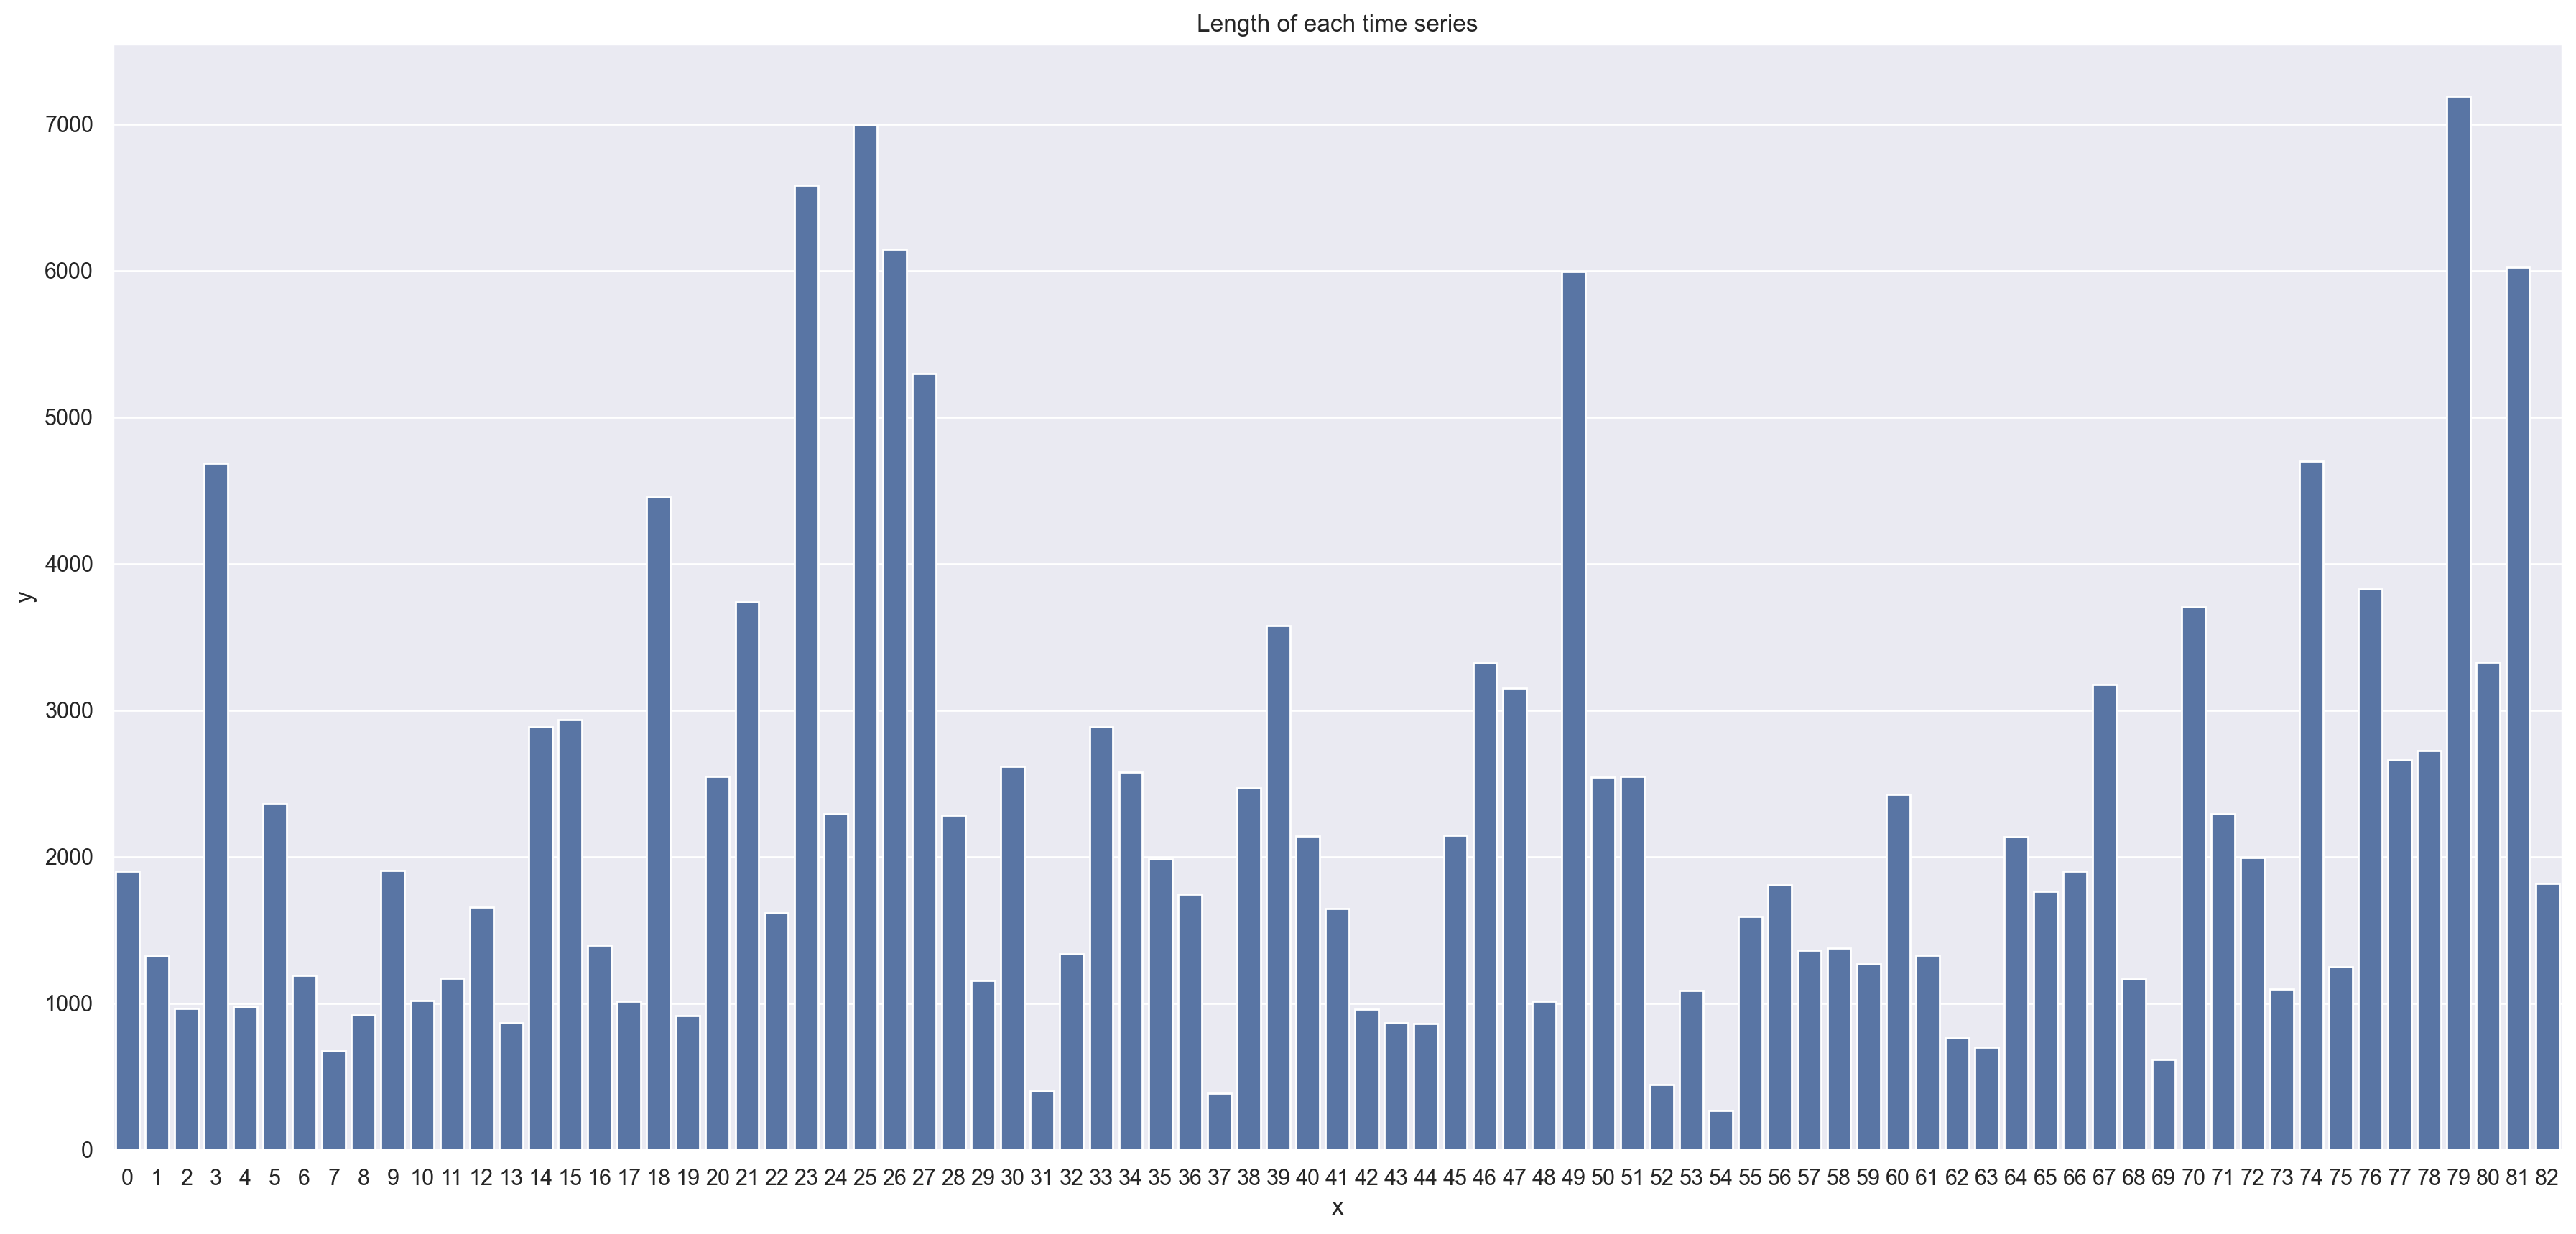

In [10]:
count_rows = []
for value in listdf:
  count_rows.append(value.shape[0])
raw_data = {'x': np.arange(len(count_rows)), 'y': count_rows}
sns.barplot(x='x', y='y', data=raw_data).set(title='Length of each time series')

In [11]:
df = pd.concat(listdf, axis=0, ignore_index=True)

In [12]:
df

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ,Mobility_Pattern,User_Activity,Log_Number
0,2019.11.28_07.27.57,-8.388193,51.935608,0,B,12,5G,-102,-10,8.0,...,-,C,A81B,9CBA,11016972,-102.0,-1.0,Driving,Amazon_Prime animated-AdventureTime,0
1,2019.11.28_07.27.57,-8.388269,51.935542,1,B,12,5G,-102,-10,8.0,...,-,C,A81B,9CBA,11016972,-102.0,-1.0,Driving,Amazon_Prime animated-AdventureTime,0
2,2019.11.28_07.27.58,-8.388269,51.935542,1,B,12,5G,-102,-10,8.0,...,-,C,A81B,9CBA,11016972,-102.0,-1.0,Driving,Amazon_Prime animated-AdventureTime,0
3,2019.11.28_07.27.59,-8.388269,51.935542,1,B,12,5G,-102,-10,3.0,...,-,C,A81B,9CBA,11016972,-101.0,-3.0,Driving,Amazon_Prime animated-AdventureTime,0
4,2019.11.28_07.28.00,-8.388269,51.935542,1,B,12,5G,-102,-10,3.0,...,-,C,A81B,9CBA,11016972,-101.0,-3.0,Driving,Amazon_Prime animated-AdventureTime,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188706,2019.12.16_13.36.25,-8.394601,51.886139,0,B,11,5G,-101,-13,-7.0,...,-,B,A4DF,9CBA,10805003,-103.0,-20.0,Static,Netflix Season3-StrangerThings,82
188707,2019.12.16_13.36.27,-8.394601,51.886139,0,B,11,5G,-101,-13,-7.0,...,-,B,A4DF,9CBA,10805003,-103.0,-20.0,Static,Netflix Season3-StrangerThings,82
188708,2019.12.16_13.36.28,-8.394601,51.886139,0,B,11,5G,-103,-12,5.0,...,-,B,A4DF,9CBA,10805003,-105.0,-19.0,Static,Netflix Season3-StrangerThings,82
188709,2019.12.16_13.36.29,-8.394601,51.886139,0,B,11,5G,-103,-12,5.0,...,-,B,A4DF,9CBA,10805003,-105.0,-19.0,Static,Netflix Season3-StrangerThings,82


In [13]:
df.dtypes

Timestamp            object
Longitude           float64
Latitude            float64
Speed                 int64
Operatorname         object
CellID                int64
NetworkMode          object
RSRP                  int64
RSRQ                 object
SNR                  object
CQI                  object
RSSI                 object
DL_bitrate            int64
UL_bitrate            int64
State                object
PINGAVG              object
PINGMIN              object
PINGMAX              object
PINGSTDEV            object
PINGLOSS             object
CELLHEX              object
NODEHEX              object
LACHEX               object
RAWCELLID             int64
NRxRSRP              object
NRxRSRQ              object
Mobility_Pattern     object
User_Activity        object
Log_Number            int64
dtype: object

I will drop some information that I do not think is necessary for the purpose of the application.

In [14]:
df.drop(['Operatorname','Speed','PINGAVG','PINGMIN','PINGMAX','PINGSTDEV','PINGLOSS','CELLHEX','NODEHEX','LACHEX','RAWCELLID','NRxRSRP','NRxRSRQ'],axis = 1, inplace=True)

In [15]:
df = df.replace('-', np.nan)

In [16]:
df.isna().sum()

Timestamp               0
Longitude               0
Latitude                0
CellID                  0
NetworkMode             0
RSRP                    0
RSRQ                 3634
SNR                 17096
CQI                 17097
RSSI                53573
DL_bitrate              0
UL_bitrate              0
State                   0
Mobility_Pattern        0
User_Activity           0
Log_Number              0
dtype: int64

In [17]:
# Convert unkown string to datetime64
# add TZ +1000 for Dublin, Ireland UTC
df["Timestamp"] = df["Timestamp"].apply(lambda row : row[:9].replace(".", "-") + row[9:].replace(".", ":").replace("_", " ") ).astype("datetime64[ns]")

In [18]:
# Change some object to columns to same dtype
df[["RSRP","RSRQ","SNR","CQI","RSSI"]] = df[["RSRP","RSRQ","SNR","CQI","RSSI"]].astype(float).astype('Int64')

In [19]:
df.head()

,Timestamp,Longitude,Latitude,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,Mobility_Pattern,User_Activity,Log_Number
0,2019-11-28 07:27:57,-8.388193,51.935608,12,5G,-102,-10,8,14,<NA>,0,0,I,Driving,Amazon_Prime animated-AdventureTime,0
1,2019-11-28 07:27:57,-8.388269,51.935542,12,5G,-102,-10,8,14,<NA>,0,0,I,Driving,Amazon_Prime animated-AdventureTime,0
2,2019-11-28 07:27:58,-8.388269,51.935542,12,5G,-102,-10,8,14,<NA>,0,2,D,Driving,Amazon_Prime animated-AdventureTime,0
3,2019-11-28 07:27:59,-8.388269,51.935542,12,5G,-102,-10,3,14,<NA>,3,2,D,Driving,Amazon_Prime animated-AdventureTime,0
4,2019-11-28 07:28:00,-8.388269,51.935542,12,5G,-102,-10,3,14,<NA>,9,13,D,Driving,Amazon_Prime animated-AdventureTime,0


Observation about CQI

In [20]:
df.NetworkMode.unique()

array(['5G', 'LTE', 'HSUPA', 'UMTS', 'HSPA+', 'HSDPA', 'EDGE', 'GPRS'],
      dtype=object)

In [21]:
df.CQI.unique()

<IntegerArray>
[14, 13, 12, 10, 15, 11, 9, 8, 6, 4, 7, 5, 2, <NA>, 3, 1, 0]
Length: 17, dtype: Int64

In [22]:
df[ (df.NetworkMode == "UMTS") | (df.NetworkMode == "EDGE") | (df.NetworkMode == "GPRS")].CQI.value_counts(dropna=False)

CQI
<NA>    583
Name: count, dtype: Int64

In [23]:
df[(df.NetworkMode == "HSPA+") | (df.NetworkMode == "HSDPA") | (df.NetworkMode == "HSUPA") ].CQI.value_counts(dropna=False)

CQI
<NA>    16513
Name: count, dtype: Int64

In HSDPA, the CQI value ranges from 0 ~ 30. 30 indicates the best channel quality and 0,1 indicates the poorest channel quality. Depending which value UE reports, network transmit data with different transport block size. If network gets high CQI value from UE, it transmit the data with larger transport block size and vice versa. 

In [24]:
df[(df.NetworkMode == "LTE") | (df.NetworkMode == "5G")].CQI.value_counts(dropna=False)

CQI
14      27234
12      22830
15      21188
11      20549
10      18903
9       16247
8       11717
13      10148
7        9323
6        7148
5        3033
4        1854
3         576
2         438
1         417
0           9
<NA>        1
Name: count, dtype: Int64

Analysis per dataset entry

In [25]:
df_serie = df[(df.Log_Number == 50)]

<Axes: >

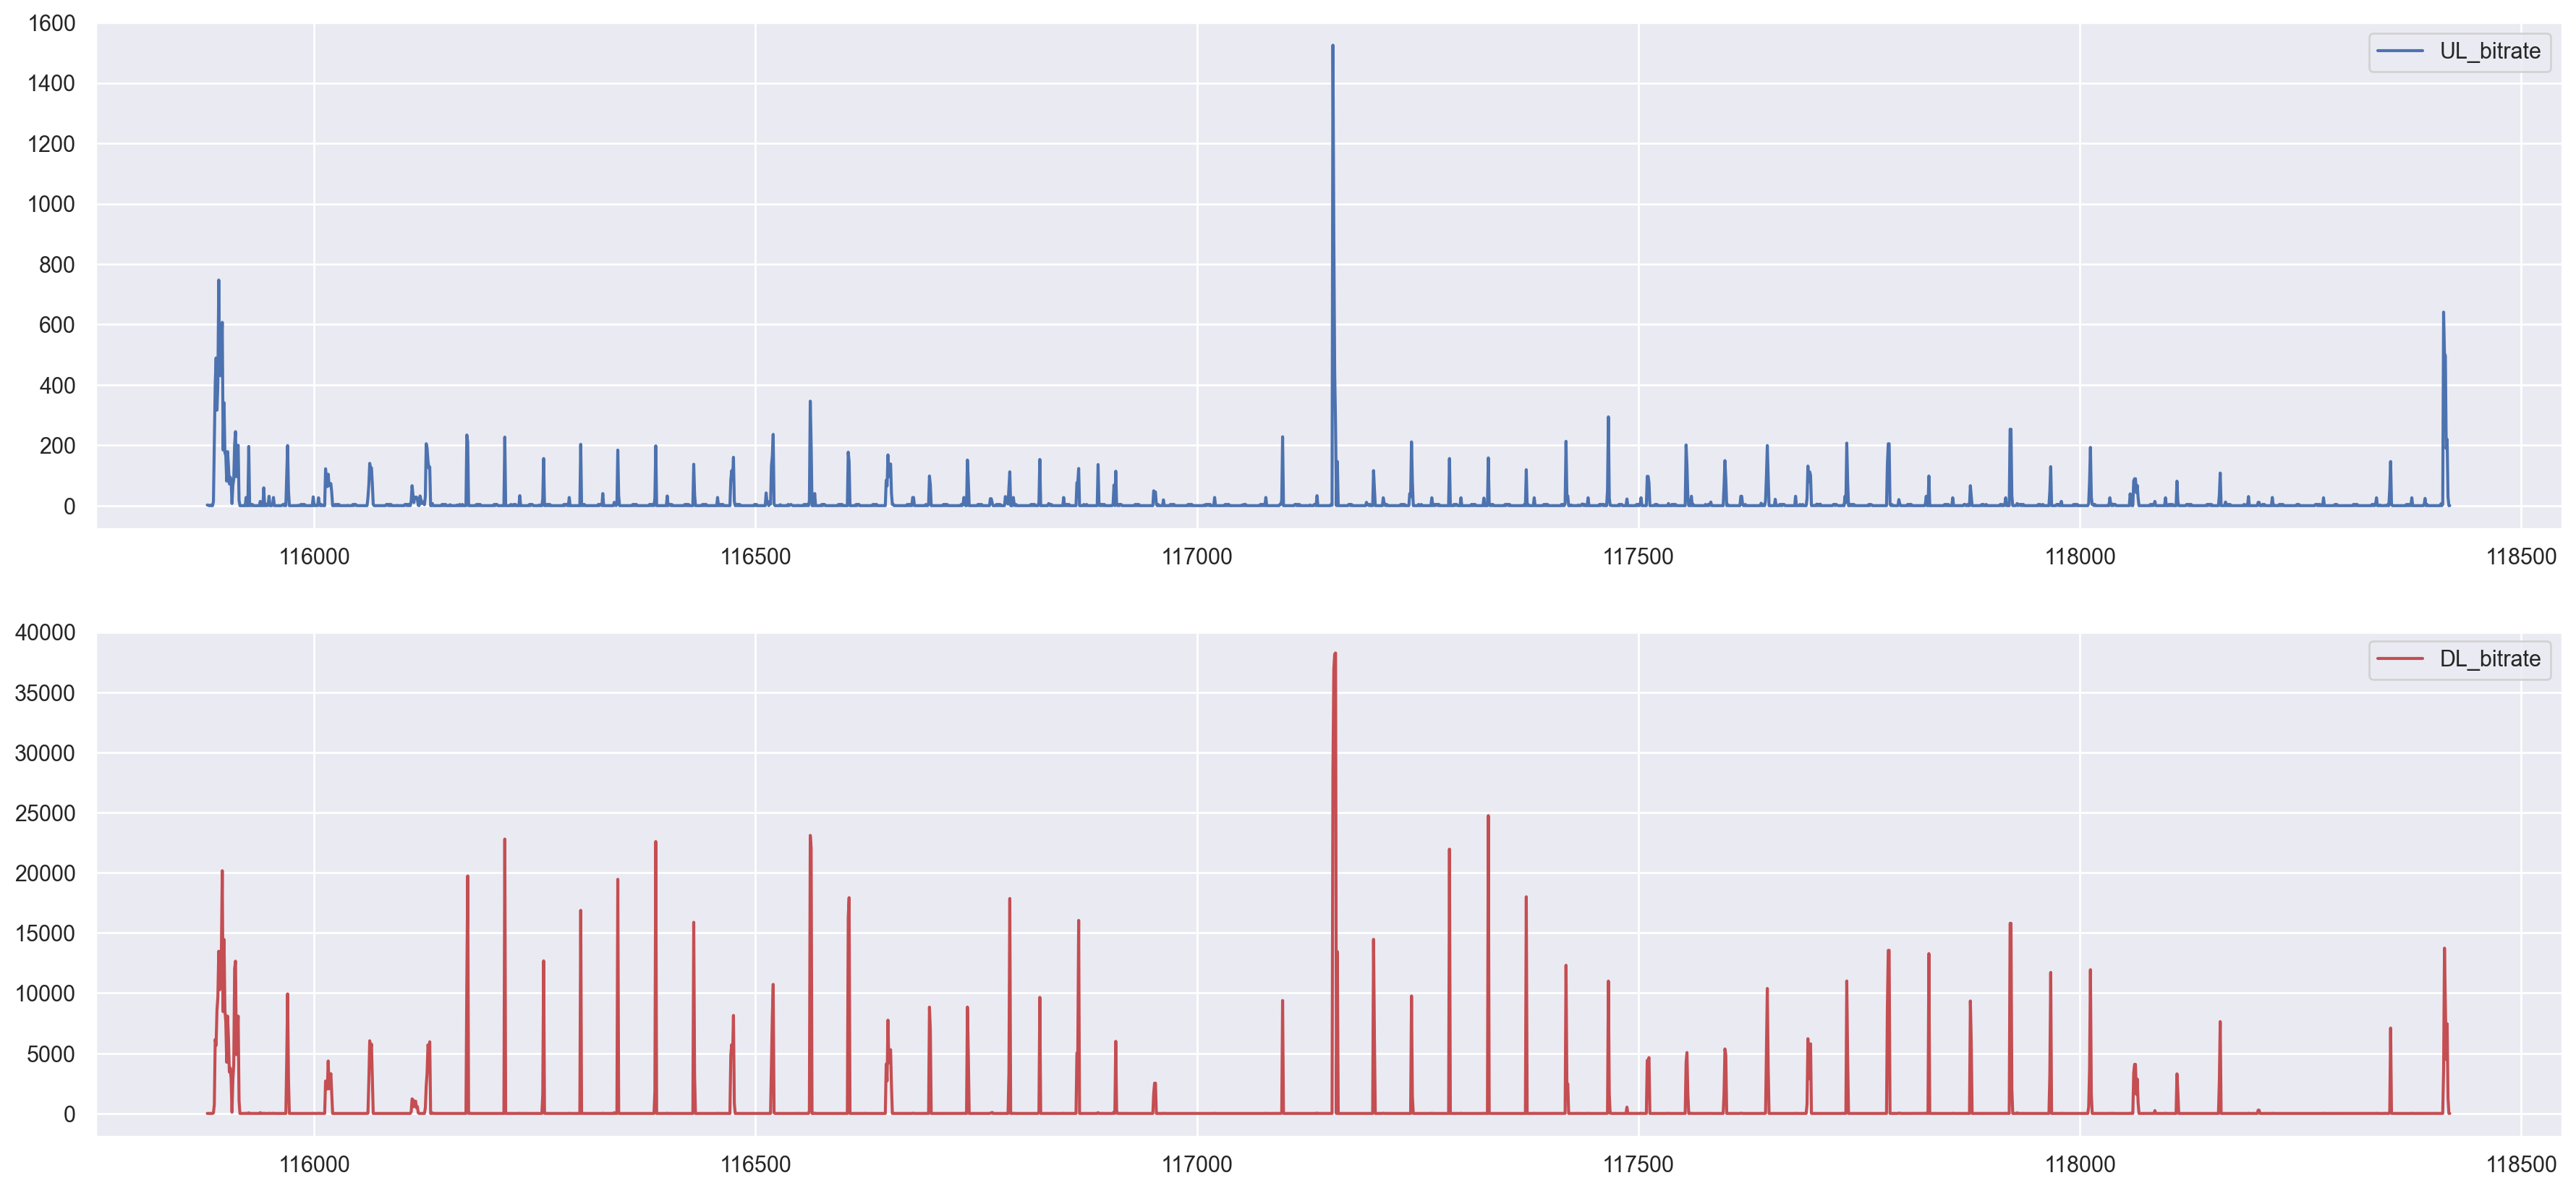

In [26]:
fig, ax = plt.subplots(2, 1)

df_serie.plot(kind='line',y='UL_bitrate',color='b',ax=ax[0])
df_serie.plot(kind='line',y='DL_bitrate',color='r',ax=ax[1])

<Axes: xlabel='Timestamp'>

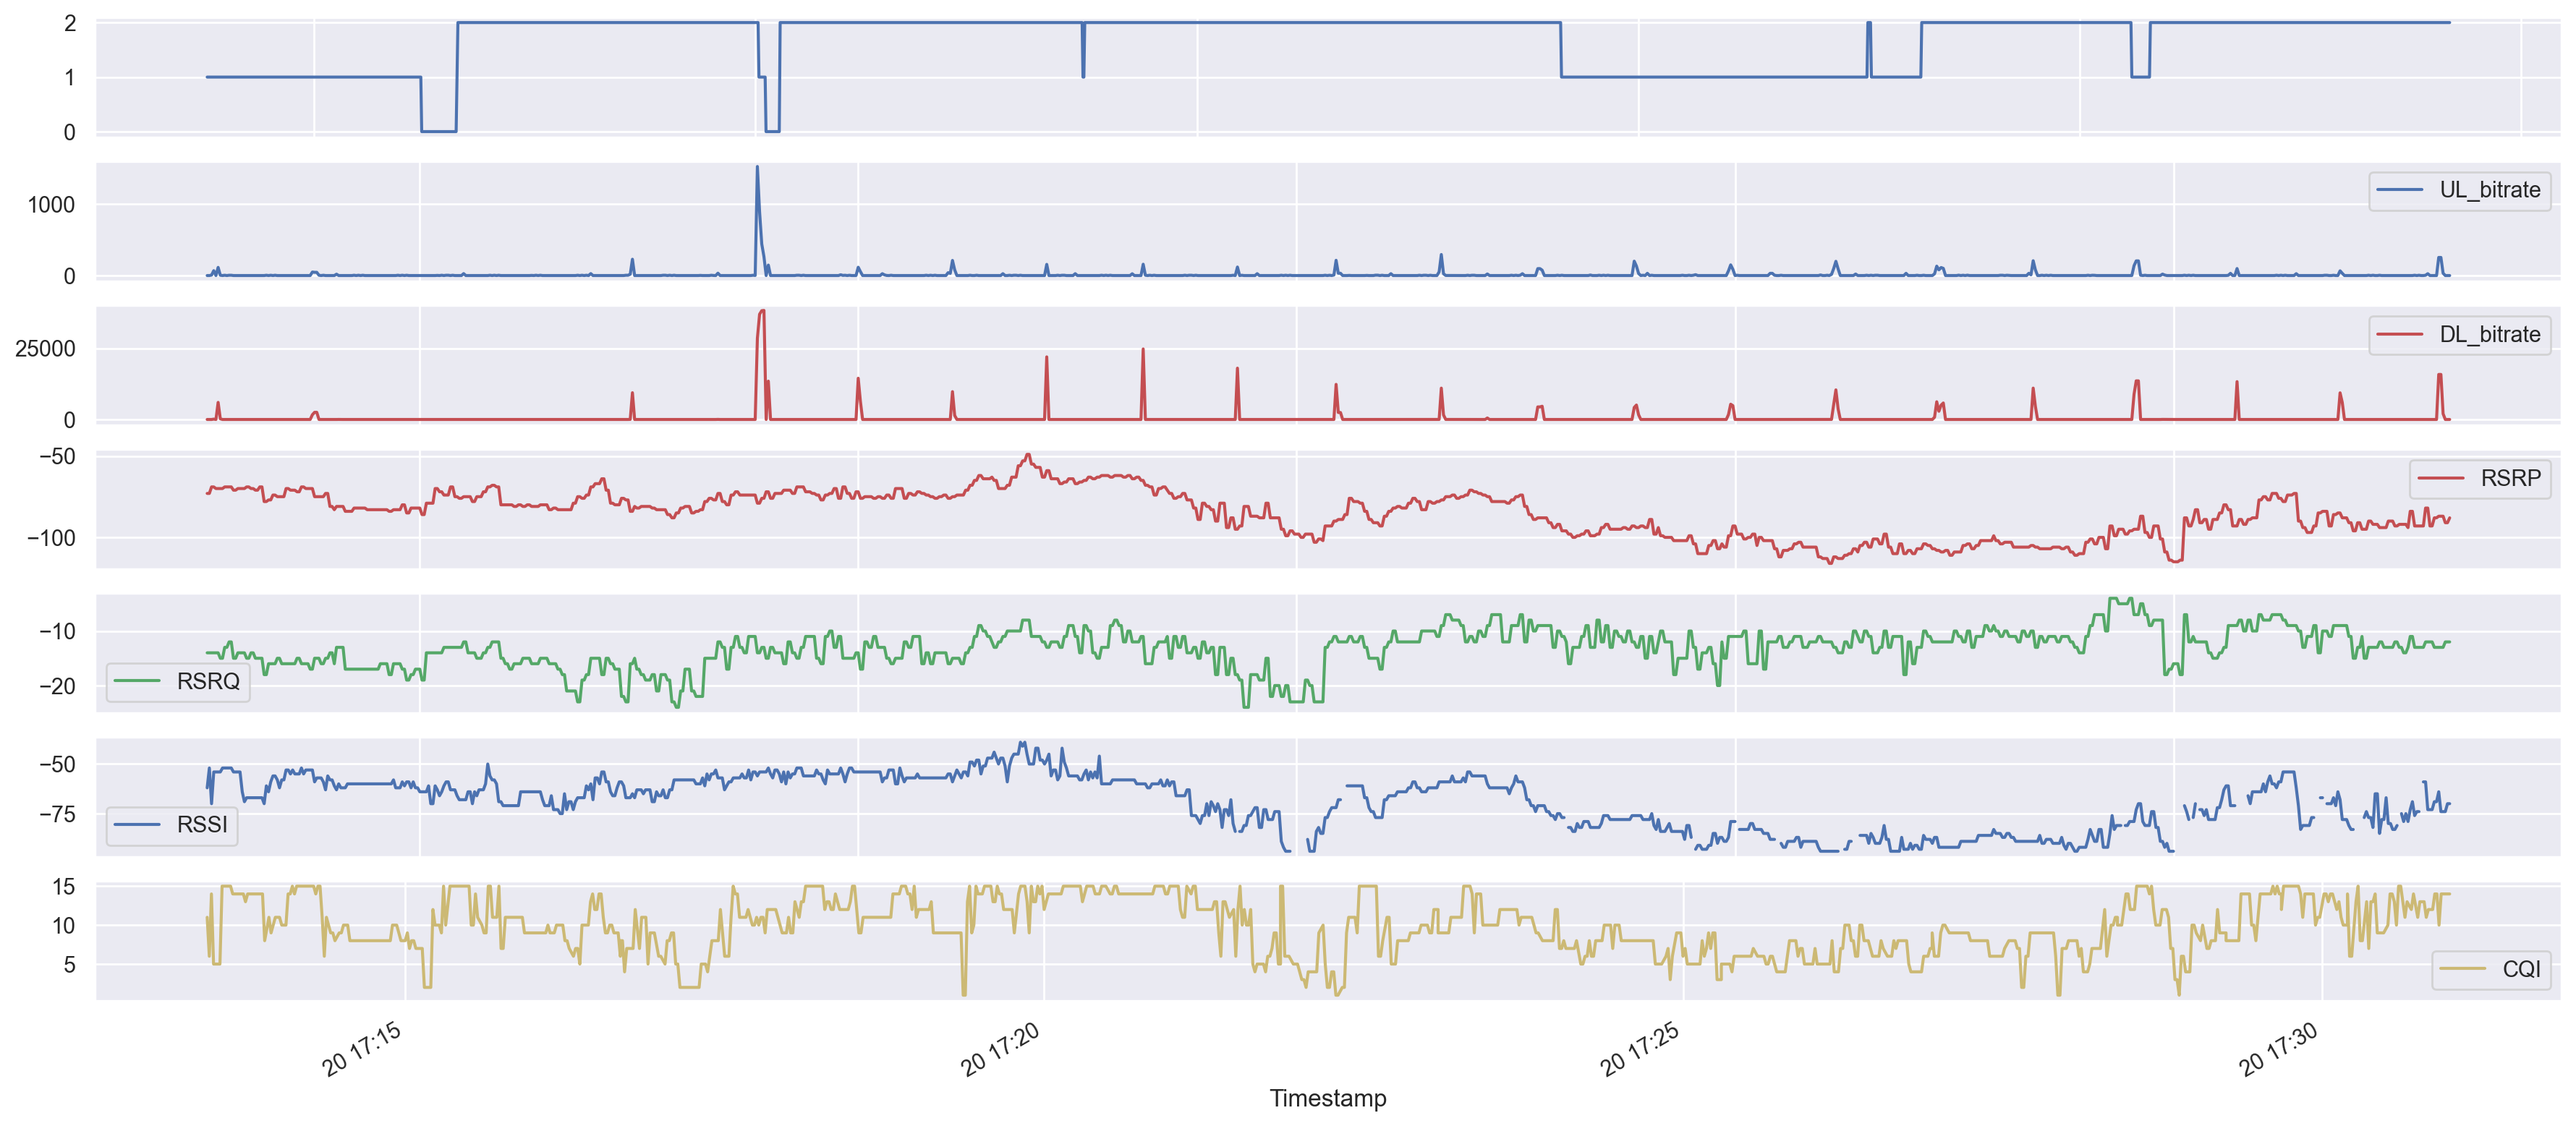

In [29]:
fig, ax = plt.subplots(7, 1)

# Para ver em qual momento a rede alterou de tecnologia
df_serie['NetworkMode'].map({'5G': 2, 'LTE': 1 }).fillna(0).astype(int).plot(kind='line', sharex=True,yticks=[0,1,2],ax=ax[0])

df_serie.plot(kind='line',sharex=True,y='UL_bitrate',color='b',ax=ax[1])
df_serie.plot(kind='line',sharex=True,y='DL_bitrate',color='r',ax=ax[2])
df_serie.plot(kind='line',sharex=True,y='RSRP',color='r',ax=ax[3])
df_serie.plot(kind='line',sharex=True,y='RSRQ',color='g',ax=ax[4])
df_serie.plot(kind='line',sharex=True,y='RSSI',color='b',ax=ax[5])
df_serie.plot(kind='line',x='Timestamp',y='CQI',color='y',ax=ax[6])

In [40]:
64 * 4

256

In [39]:
64 * 4 + 64

320

<Axes: xlabel='Timestamp'>

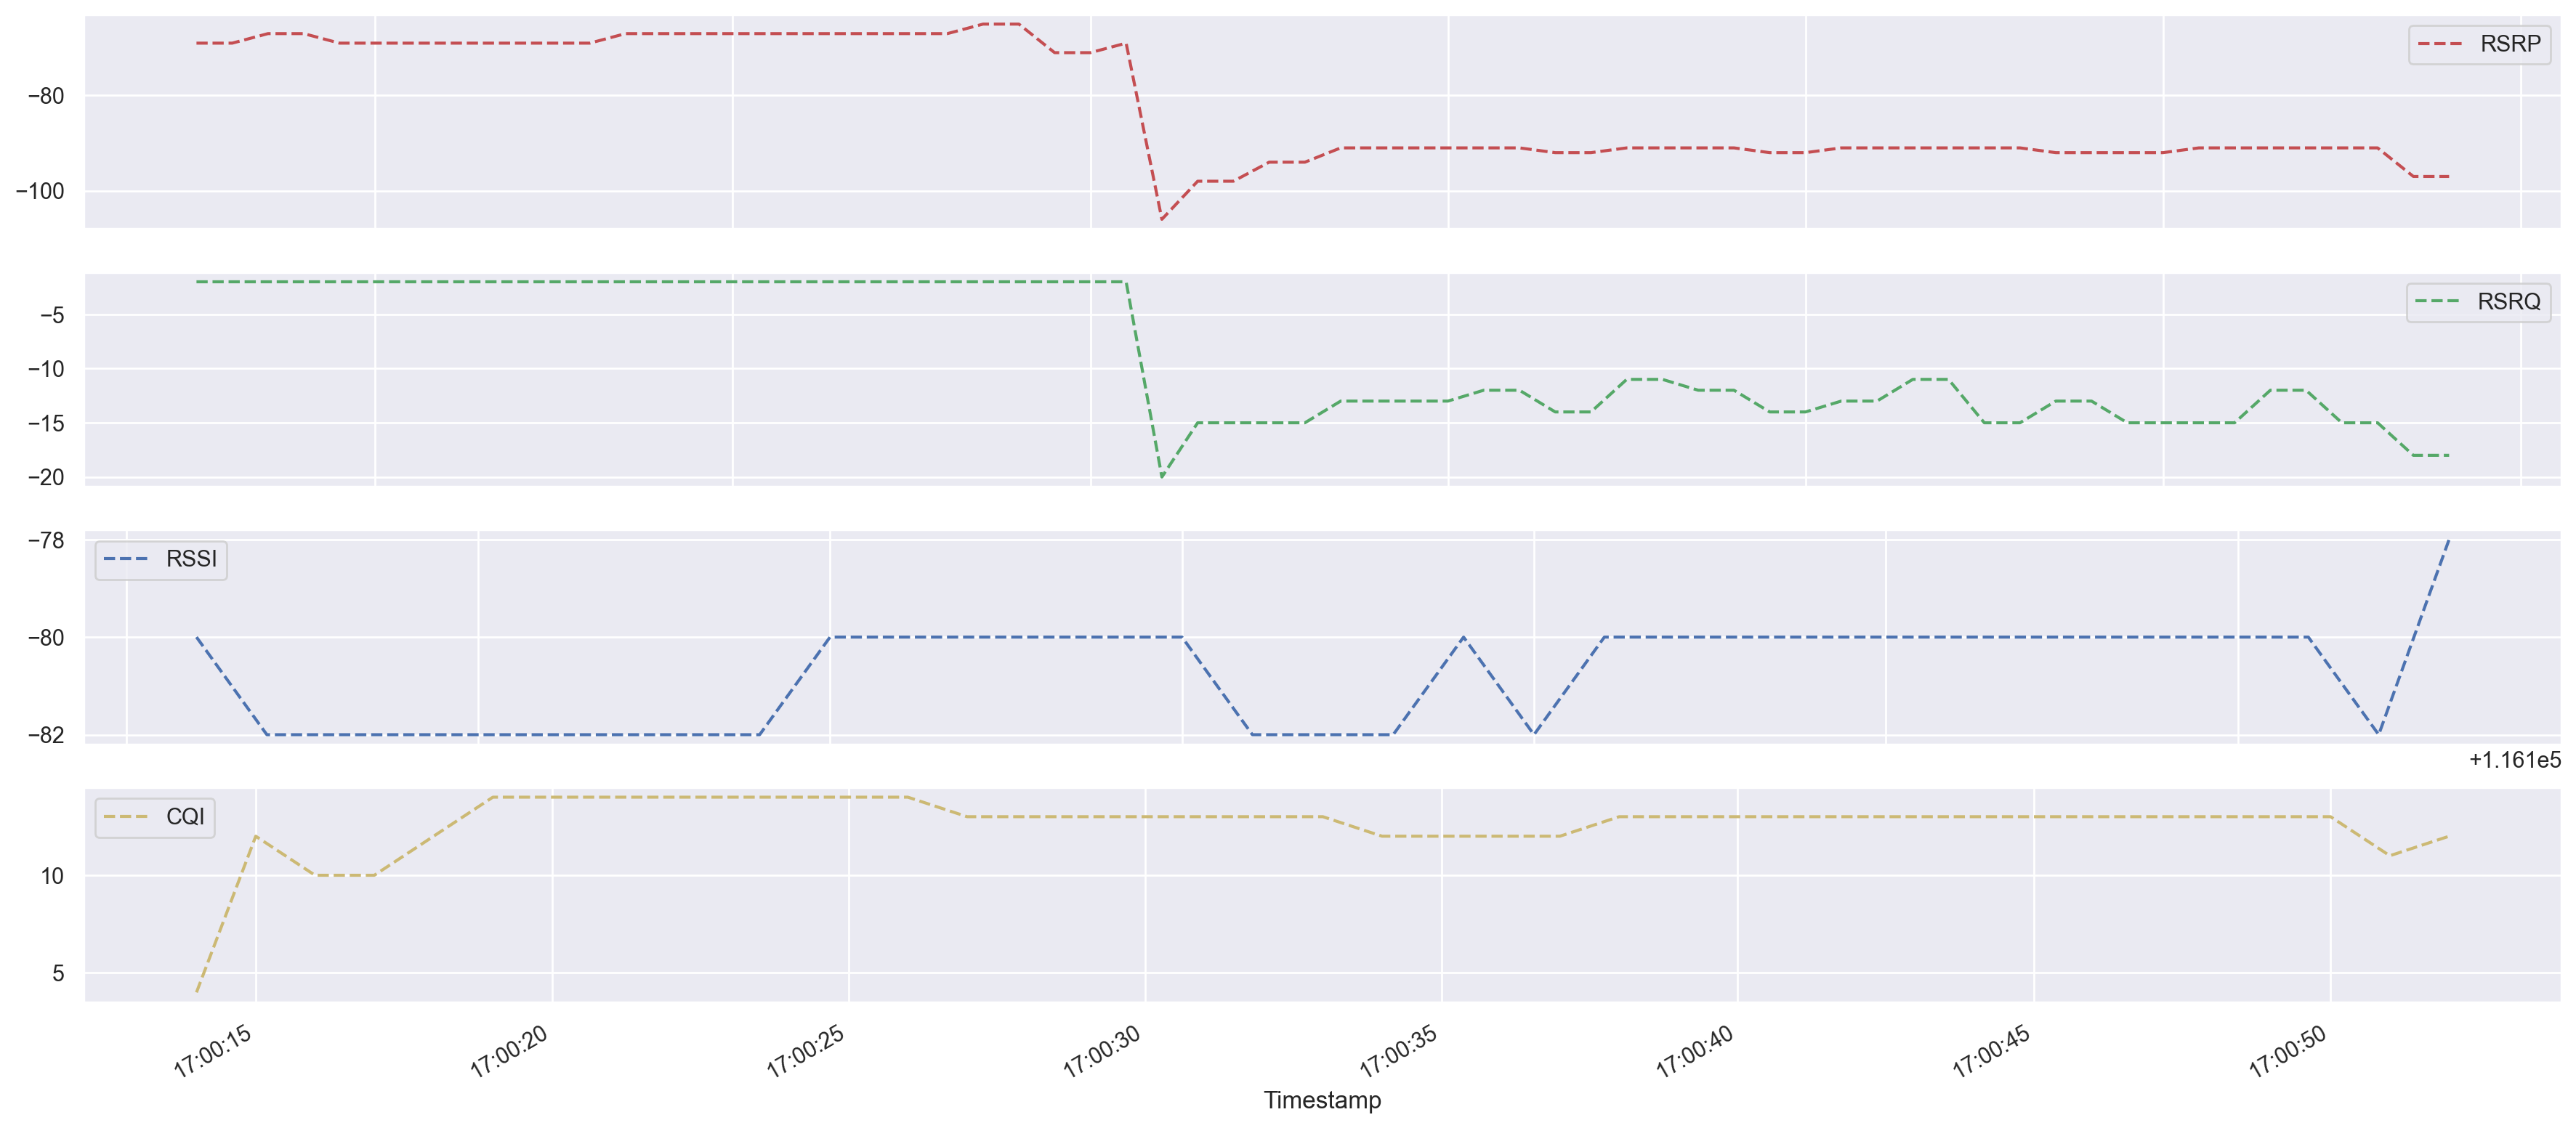

In [42]:
fig, ax = plt.subplots(4, 1)

begin = 64
end = begin*4


df_serie[256:320].plot(kind='line',sharex=True,y='RSRP',color='r',style='--',ax=ax[0])
df_serie[256:320].plot(kind='line',sharex=True,y='RSRQ',color='g',style='--',ax=ax[1])
df_serie[256:320].plot(kind='line',sharex=True,y='RSSI',color='b',style='--',ax=ax[2])
df_serie[256:320].plot(kind='line',x='Timestamp',y='CQI',color='y',style='--',ax=ax[3])

In [28]:
df[(df.Timestamp >= '2019-11-28 07:45:59') & (df.Timestamp <= '2019-11-28 07:50:59') & (df.Log_Number == 0)]

,Timestamp,Longitude,Latitude,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,Mobility_Pattern,User_Activity,Log_Number
1023,2019-11-28 07:45:59,-8.473302,51.905067,57212,HSPA+,-63,-2,<NA>,<NA>,<NA>,280,7,D,Driving,Amazon_Prime animated-AdventureTime,0
1024,2019-11-28 07:46:01,-8.473302,51.905067,57212,HSPA+,-63,-2,<NA>,<NA>,<NA>,2211,39,D,Driving,Amazon_Prime animated-AdventureTime,0
1025,2019-11-28 07:46:02,-8.473302,51.905067,57212,HSPA+,-63,-2,<NA>,<NA>,<NA>,280,10,D,Driving,Amazon_Prime animated-AdventureTime,0
1026,2019-11-28 07:46:03,-8.473302,51.905067,57212,HSPA+,-59,-2,<NA>,<NA>,<NA>,1619,36,D,Driving,Amazon_Prime animated-AdventureTime,0
1027,2019-11-28 07:46:04,-8.473302,51.905067,57212,HSPA+,-59,-2,<NA>,<NA>,<NA>,0,0,I,Driving,Amazon_Prime animated-AdventureTime,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2019-11-28 07:50:55,-8.476943,51.900289,13,5G,-82,-15,1,13,-77,0,3,D,Driving,Amazon_Prime animated-AdventureTime,0
1294,2019-11-28 07:50:56,-8.476943,51.900289,13,5G,-76,-10,16,13,-75,0,0,D,Driving,Amazon_Prime animated-AdventureTime,0
1295,2019-11-28 07:50:57,-8.476943,51.900289,13,5G,-76,-10,16,13,-75,1822,14,D,Driving,Amazon_Prime animated-AdventureTime,0
1296,2019-11-28 07:50:58,-8.476943,51.900289,13,5G,-83,-11,6,14,-77,0,0,I,Driving,Amazon_Prime animated-AdventureTime,0


Decompose experiment

In [ ]:
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm

In [ ]:
df_serie.CQI.dropna().reset_index(drop=True).plot()


In [ ]:
data = df_serie.CQI.dropna().reset_index(drop=True)

In [ ]:
autocorrelation_plot(data)

In [ ]:
sm.graphics.tsa.plot_acf(data)

In [ ]:
sm.graphics.tsa.plot_pacf(data)

In [ ]:
seasonal_decompose(data, model='mutiplicative', period=7).plot()

Seasonal-Trend decomposition using LOESS (STL)

In [ ]:
res = STL(data, period=7).fit()
res.plot()